# Clustering Algorithm Explorer
Test out the various algorithms in a playground.

In [1]:
# Path to the CSV file containing the collected splats.
DATA_NAME = "collected_splats"

In [2]:
from clustering_exploration.utils.data_handler import load_splats
from numpy.random import default_rng

splats = load_splats(DATA_NAME)

# Algorithms

Pick one using the index:

1. Sequential _k_-Means Clustering: Online k-means algorithm proposed [here](https://www.cs.princeton.edu/courses/archive/fall08/cos436/Duda/C/sk_means.htm)
2. k-Means: Cluster splats using K-Means clustering. This is the offline "oracle" version of the clustering.
3. Epsilon Clustering: Cluster splats that are within an epsilon distance of each other.
4. Equal-sized Bins


In [3]:
ALGORITHM_INDEX = 5

# Common values.
CLUSTERS = 12
EPSILON = 0.11
RANDOMIZE = False

In [4]:
# Shuffle the order of splats in the data if configured.
if RANDOMIZE:
    default_rng().shuffle(splats, axis=1)

In [5]:
from clustering_exploration.algorithms.algorithm_base import AlgorithmBase
from clustering_exploration.algorithms.sequential_k_means import SequentialKMeansAlgorithm
from clustering_exploration.algorithms.k_means import KMeansAlgorithm
from clustering_exploration.algorithms.epsilon import EpsilonAlgorithm
from clustering_exploration.algorithms.binned import BinnedAlgorithm
from clustering_exploration.algorithms.sequential_k_means_random_init import SequentialKMeansRandomInitAlgorithm

def algorithm_selector(index: int) -> AlgorithmBase:
    """Select an algorithm based on the index.
    
    Args:
        index: Algorithm index.
    """
    match index:
        case 1:
            return SequentialKMeansAlgorithm(splats, CLUSTERS)
        case 2:
            return KMeansAlgorithm(splats, CLUSTERS)
        case 3:
            return EpsilonAlgorithm(splats, EPSILON)
        case 4:
            return BinnedAlgorithm(splats, CLUSTERS)
        case 5:
            return SequentialKMeansRandomInitAlgorithm(splats, CLUSTERS)

In [6]:
clustered_splats = algorithm_selector(ALGORITHM_INDEX).compute()

  0%|          | 0/1051648 [00:00<?, ?it/s]

/Users/kenneth/Documents/School_GitHub/PLSE/clustering-exploration/venv/clustering-exploration/lib/python3.13/site-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: Using fork() can cause Polars to deadlock in the child process.
In addition, using fork() with Python in general is a recipe for mysterious
deadlocks and crashes.

The most likely reason you are seeing this error is because you are using the
multiprocessing module on Linux, which uses fork() by default. This will be
fixed in Python 3.14. Until then, you want to use the "spawn" context instead.

See https://docs.pola.rs/user-guide/misc/multiprocessing/ for details.

If you really know what your doing, you can silence this warning with the warning module
or by setting POLARS_ALLOW_FORKING_THREAD=1.

  pid = os.fork()


# Compute Image From Clusters
Compute the final pixel color by alpha compositing the clusters.

  0%|          | 0/1051648 [00:00<?, ?it/s]

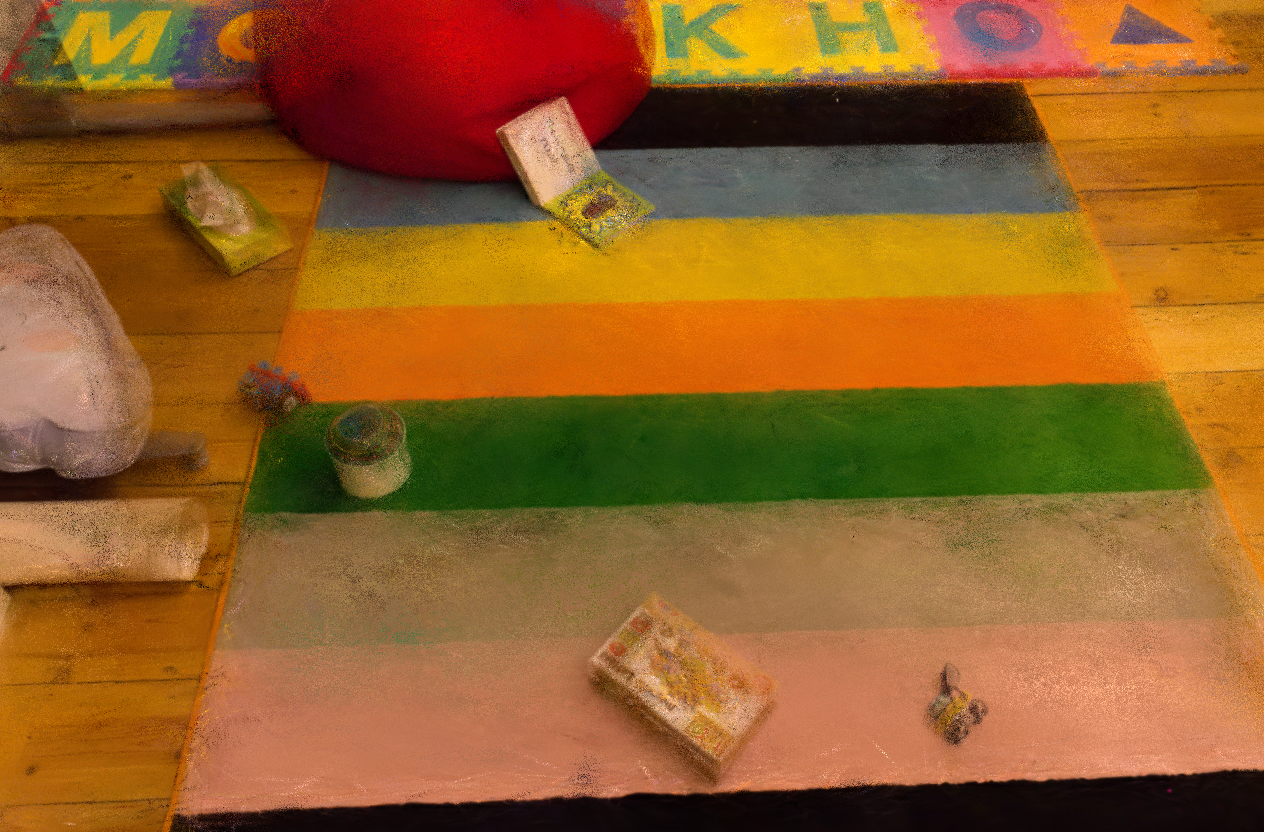

In [8]:
from clustering_exploration.utils.image_handler import compute_image_from_clusters

# Select an output name based on algorithm.
output_file_name = [
    f"sequential_k_means_clustering_k_{CLUSTERS}",
    f"k_means_clustering_k_{CLUSTERS}",
    f"epsilon_clustering_{EPSILON}",
    "binned_clustering",
    f"sequential_k_means_clustering_random_init_k_{CLUSTERS}"
][ALGORITHM_INDEX - 1]

display(compute_image_from_clusters(clustered_splats, output_file_name))